## import data science and ML libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## read the dataset using pandas

In [2]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics basics/datasets/carsspeed.csv',index_col=0)
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [4]:
df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


No preprocessing is required in this dataset, coz data is clean

## Visualize the data 

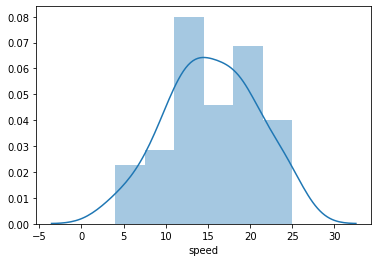

In [5]:
sns.distplot(df['speed'])
plt.show()

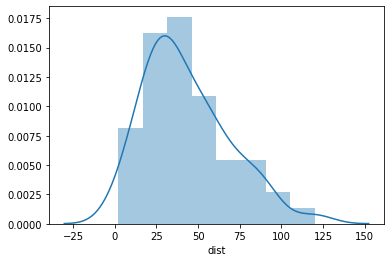

In [6]:
sns.distplot(df['dist'])
plt.show()

In [7]:
fig = px.scatter(df,x='speed',y='dist',size='dist',width=900)
fig.show()

In [8]:
# old way of doing the similar plot
# df.plot.scatter(x='speed',y='dist',s=df['dist'],figsize=(15,4))
# plt.show()

# split the data in
- X (features ) => always be vector [2d data] and 
- y (labels)

In [9]:
X = df[['speed']] # double sqaure brackets on df means the data will be a dataframe which is always vector
X.shape

(50, 1)

In [10]:
y = df['dist'] # its a single column and always scaler (1d data)
y.shape

(50,)

## Split the data into two parts 
- training data 
- test data


In [11]:
from sklearn.model_selection import train_test_split # function to automatically split data into 4 portions

In [12]:
# test_size property will split data into 80:20 portion
# random_state is not necessary
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2,random_state=21 )


In [13]:
print("data distribution\nX train",xtrain.shape,"\nY train",ytrain.shape,"\nX test",xtest.shape,"\nY test",ytest.shape)

data distribution
X train (40, 1) 
Y train (40,) 
X test (10, 1) 
Y test (10,)


## train the algorithm
also called fitting the data into algo

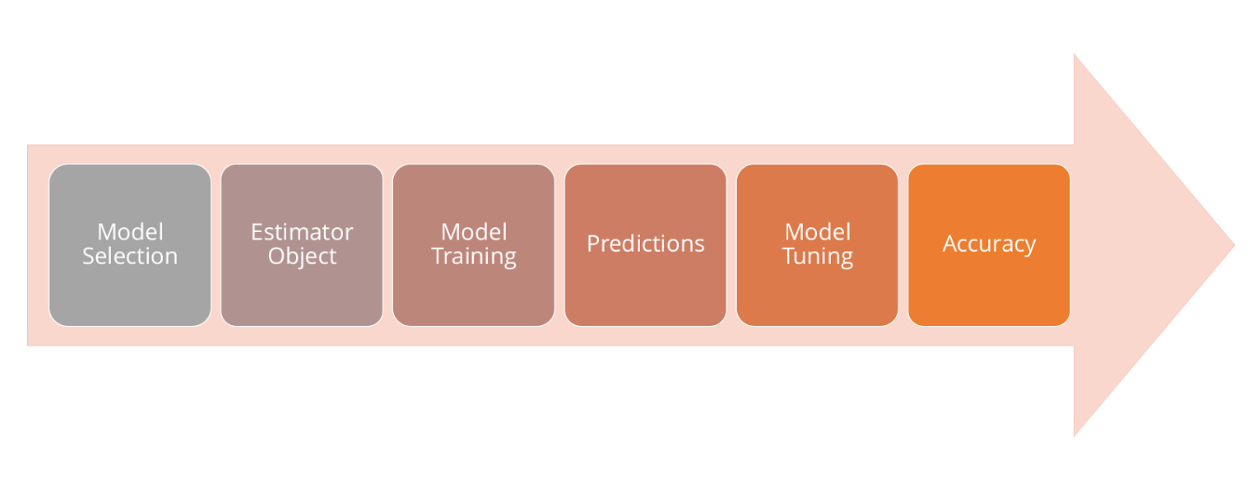

In [14]:
reg = LinearRegression() # estimator object

In [15]:
reg.fit(xtrain, ytrain) # train the model(estimator) object
# output doesnt matter from here

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## evaluate the model and make some predictions

In [16]:
# use score to pass test data and get accuracy of model also called R-square
reg.score(xtest, ytest) * 100

75.08178606906382

In [17]:
ypred = reg.predict(xtrain) # check predictions
# also visualize this

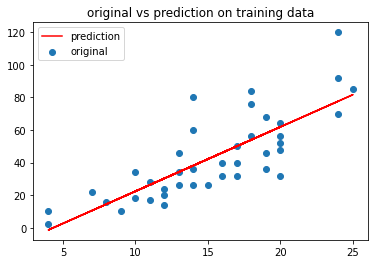

In [18]:
plt.plot(xtrain, ypred,label='prediction',color='red')
plt.scatter(xtrain, ytrain,label='original')
plt.title("original vs prediction on training data")
plt.legend()
plt.show()

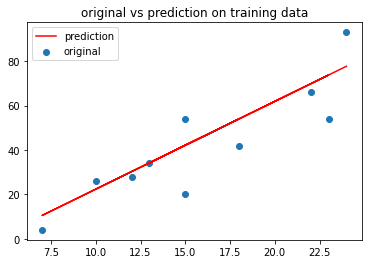

In [19]:
ypred= reg.predict(xtest)
plt.plot(xtest, ypred,label='prediction',color='red')
plt.scatter(xtest, ytest,label='original')
plt.title("original vs prediction on training data")
plt.legend()
plt.show()

## now train the full data with alogrithm
coz we know its works well , so we train it on full dataset

In [20]:
model = LinearRegression()
model.fit(X,y)
# last 2 lines not neccessary
ypred = model.predict(X)
df['predicted'] = ypred


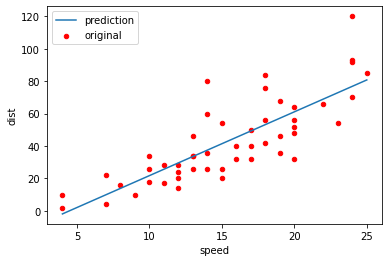

In [21]:
ax = df.plot.scatter(x='speed',y='dist',c='red',label='prediction')
df.plot.line(x='speed',y='predicted',label='original',ax=ax)
plt.show()

## show some metrics

In [22]:
# root mean sqaured error -> help to understand how much +- results are going to be
RMSE = np.sqrt(mean_squared_error(df['dist'], df['predicted']))

In [23]:
print(RMSE)

15.068855995791381


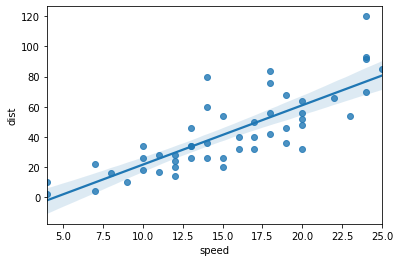

In [24]:
# quickest way to know if linear regression is possible on data or not
sns.regplot(x='speed',y='dist',data=df)
plt.show()
# this graph shows the data is positive related and hence we can use linear regression

## user input for prediction

In [28]:
speed = input("tell me the speed ")
if speed.isnumeric():
    features = np.array([[int(speed)]])
    result = model.predict(features)
    print("prediction",result[0])

tell me the speed 100
prediction 375.6617810218979
